In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from datetime import datetime
from modules import *

In [2]:
from importlib.machinery import SourceFileLoader

m = SourceFileLoader("m","/export/home/agletdinov/work/git_projects/gitlab/collapse-pango-lineages/modules.py").load_module()

In [3]:
ROOT = Path().cwd().parent
DATA = ROOT / "data"

In [4]:
df = pd.read_csv(DATA / "ежедневный_расширенный_отчёт_2024-10-05 16-00-01.tsv.gz",sep='\t',quoting=3,
                 usecols=["id последовательности", "Дата забора", "Pangolin"],
                 dtype={"id последовательности":"str",
                        "Pangolin": str},
                 parse_dates=['Дата забора'])

In [5]:
df = df[df["Дата забора"] > "2020-01-01"]

In [6]:
df.dtypes

id последовательности            object
Дата забора              datetime64[ns]
Pangolin                         object
dtype: object

In [7]:
df.shape

(332512, 3)

In [8]:
df.dropna(subset=["Pangolin"], inplace=True)

In [9]:
df.shape

(210046, 3)

In [10]:
df.head()

,id последовательности,Дата забора,Pangolin
0,crie000002,2020-12-28,B.1.1
1,crie000003,2020-12-28,B.1.1
40,crie000005,2020-03-27,B.1
41,crie000006,2020-11-06,B.1.1
42,crie000007,2020-11-06,B.1.1.397


In [11]:
df["Pangolin"].value_counts()

AY.122 Delta (B.1.617.2-like)               33036
BA.5.2 Omicron (BA.5-like)                  19936
BA.1.1 Omicron (BA.1-like)                  11900
BA.5.2 Omicron (Unassigned)                  8133
BA.2 Omicron (BA.2-like)                     7086
                                            ...  
XBB.1.9.2 Omicron (XBB.1.5-like)                1
BA.2 Probable Omicron (BA.3-like)               1
XBB.1.16.2 Probable Omicron (Unassigned)        1
BA.1.21 Omicron (Unassigned)                    1
LB.1.4 Probable Omicron (Unassigned)            1
Name: Pangolin, Length: 2832, dtype: int64

subdf = df.sample(frac=0.1, random_state=35)

In [12]:
subdf = df.copy()

In [13]:
mask =subdf["Pangolin"].apply(lambda x: "XEC" in x)
subdf[mask]

,id последовательности,Дата забора,Pangolin
330465,rnip012673,2024-08-18,XEC Omicron (BA.2-like)
331068,micr026849,2024-09-09,XEC Omicron (BA.2-like)
331472,micr026911,2024-08-28,XEC Omicron (BA.2-like)
331571,crie072644,2024-09-15,XEC Omicron (BA.2-like)
331810,rnip013013,2024-09-02,XEC Omicron (BA.2-like)
332323,rnip013166,2024-09-11,XEC Omicron (BA.2-like)
332641,crie072594,2024-08-29,XEC Omicron (Unassigned)
332646,crie072599,2024-08-31,XEC Omicron (BA.2-like)


In [14]:
%%time
subdf["Pangolin_collapse"] = subdf["Pangolin"].apply(lambda x: m.create_collapsed_strain(x.split(" ")[0]))

CPU times: user 1min 10s, sys: 30.3 ms, total: 1min 10s
Wall time: 1min 10s


In [15]:
subdf.shape

(210046, 4)

In [16]:
subdf["Pangolin_collapse"].value_counts()

BA.5* (Omicron)        55036
AY* (Delta)            40460
BA.1* (Omicron)        22048
FL* (Omicron)          14634
XBB* (Omicron)         13635
BA.2* (Omicron)        12507
B.1.1*                 10564
XBB.1.16* (Omicron)     7232
JN.1* (Omicron)         7197
XBB.1.5* (Omicron)      3910
Other                   3767
XBB.2.3* (Omicron)      3625
BA* (Omicron)           3566
EG.5* (Omicron)         2370
BA.2.75* (Omicron)      2011
KS.1* (Omicron)         1723
BQ.1* (Omicron)         1330
Q* (Alpha)              1158
JN.1.18* (Omicron)       619
B.1*                     475
KP.2* (Omicron)          382
LB.1* (Omicron)          354
BA.2.86* (Omicron)       333
B*                       238
BA.4* (Omicron)          235
KP.1.1* (Omicron)        179
KP.3* (Omicron)          178
B.1.351* (Beta)           91
C*                        45
BA.3* (Omicron)           29
B.1.525* (Eta)            27
P.1* (Gamma)              25
KP.4.2* (Omicron)         17
LA.1* (Omicron)           15
A*            

In [17]:
subdf[subdf["Pangolin_collapse"] == "Other"].groupby(by="Pangolin").agg(
    number_of_samples=("Pangolin","count")
            ).sort_values(by="number_of_samples", ascending=False)

,number_of_samples
Pangolin,
Unassigned,1975
Unassigned Probable Omicron (Unassigned),1178
XDA Omicron (XBB.1-like),85
XDD.1.1.1 Omicron (BA.2-like),74
Unassigned Omicron (Unassigned),53
...,...
XBF Probable Omicron (Unassigned),1
XDA Omicron (XBB-like),1
XBL Omicron (XBB.1-like),1


In [18]:
start_date = datetime(2020, 1, 1)

# Преобразование даты в количество дней от 1 января 2020 года
subdf['дни_с_2020'] = (subdf['Дата забора'] - start_date).dt.days

In [19]:
subdf.sort_values(by="дни_с_2020")

,id последовательности,Дата забора,Pangolin,Pangolin_collapse,дни_с_2020
77911,dezi000897,2020-01-15,BA.1.1 Omicron (BA.1-like),BA.1* (Omicron),14
76177,cspf002918,2020-02-03,B.1.1,B.1.1*,33
236565,crie046951,2020-02-14,BQ.1.1.1 Omicron (BA.5-like),BQ.1* (Omicron),44
76190,cspf002931,2020-02-25,B.5,B*,55
76156,cspf002897,2020-03-11,B.33,B*,70
...,...,...,...,...,...
332939,petr000819,2024-09-30,KS.1.1 Omicron (BA.2-like),KS.1* (Omicron),1734
332940,petr000820,2024-09-30,LF.1.1 Omicron (BA.2-like),JN.1* (Omicron),1734
332942,petr000822,2024-09-30,KS.1.1 Omicron (BA.2-like),KS.1* (Omicron),1734
332743,psko000249,2024-09-30,LB.1 Omicron (BA.2-like),LB.1* (Omicron),1734


In [20]:
mask = subdf["дни_с_2020"].isna()
subdf[mask].head()

,id последовательности,Дата забора,Pangolin,Pangolin_collapse,дни_с_2020


In [21]:
subdf.dropna(subset=["дни_с_2020"], inplace=True)

/tmp/ipykernel_55607/2086155871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df.sort_values(by="Дата забора", inplace=True)


Вероятность события 1810: 2.4028586629466786e-05
[False]


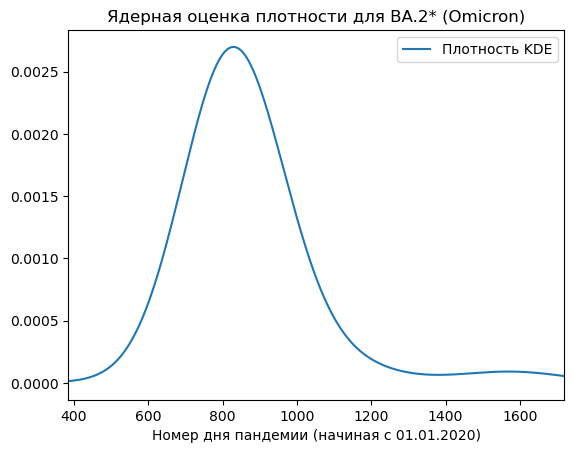

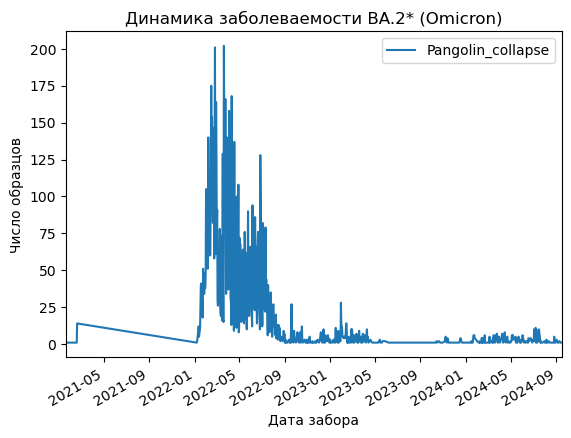

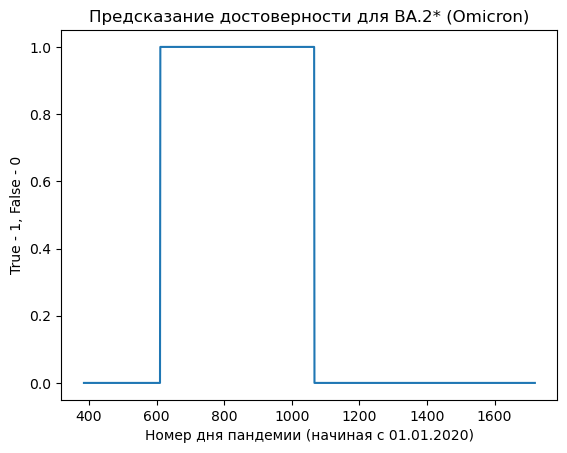

In [217]:
strain = "BA.2* (Omicron)"
new_date = pd.to_datetime('2024-12-15')
new_date_day = (new_date - start_date).days
strain_df = subdf[(subdf["Pangolin_collapse"] == strain) & (subdf["Дата забора"] <= (new_date - pd.tseries.offsets.Day()))]
assert len(strain_df) > 1
strain_df.sort_values(by="Дата забора", inplace=True)
# Получение значений для KDE
values = strain_df['дни_с_2020'].values

# Построение KDE
kde = gaussian_kde(values, bw_method=0.8)

# Генерация числовых значений для оси X (например, все дни c 2020)
x = np.arange(start=0, stop=365*5)

# Оценка плотности для каждого дня в году
density = kde(x)
probability = kde(new_date_day)
print(f'Вероятность события {new_date_day}: {probability[0]}')
q = lambda df: 75 if len(df) > 250 else 90
threshold = np.percentile(density, q(strain_df))
print(probability > threshold)




# Визуализация результатов
xmin, xmax = strain_df["дни_с_2020"].min(), strain_df["дни_с_2020"].max()
plt.plot(x, density, label='Плотность KDE')
plt.xlim(xmin, xmax)
plt.xlabel('Номер дня пандемии (начиная с 01.01.2020)')
#plt.ylabel('Плотность')
plt.title(f'Ядерная оценка плотности для {strain}')
plt.legend()
plt.show()


# Оценка вероятности для новых событий
# Определение границ оси X
xmin_date, xmax_date = strain_df["Дата забора"].min(), strain_df["Дата забора"].max()
#xmin, xmax = "2023-10-01", "2024-12-01"
strain_df.groupby(by="Дата забора").agg({"Pangolin_collapse":"count"}).plot()
plt.xlim(xmin_date, xmax_date)
plt.ylabel('Число образцов')
plt.title(f'Динамика заболеваемости {strain}')
plt.legend()
plt.show()

res = []
for i in np.arange(xmin, xmax):
    probability = kde(i)
    #print(f'Вероятность события {new_date_day}: {probability[0]}')
    #print((probability > threshold)[0])
    res.append((probability > threshold)[0])
ax = sns.lineplot(x=[i for i in np.arange(xmin, xmax)], y=res)
ax.set_title(f'Предсказание достоверности для {strain}')
ax.set_xlabel('Номер дня пандемии (начиная с 01.01.2020)')
ax.set_ylabel('True - 1, False - 0')
plt.show()

In [248]:
def create_statistics(strain, date, start_date):
    """
    F.e.: XBB.1.16
    strain = "XBB.1.16* (Omicron)"
    date = '2024-12-15'
    """
    new_date = pd.to_datetime(date)
    new_date_day = (new_date - start_date).days
    
    strain_df = subdf[(subdf["Pangolin_collapse"] == strain) & (subdf["Дата забора"] <= (new_date - pd.tseries.offsets.Day()))]
    assert len(strain_df) > 1
    strain_df.sort_values(by="Дата забора", inplace=True)
    
    # Получение значений для KDE
    values = strain_df['дни_с_2020'].values

    # Построение KDE
    kde = gaussian_kde(values, bw_method=0.8)

    # Генерация числовых значений для оси X (например, все дни c 2020)
    x = np.arange(start=0, stop=365*5)

    # Оценка плотности для каждого дня в году
    density = kde(x)
    probability = kde(new_date_day)
    print(f'Вероятность события {new_date_day}: {probability[0]}')
    q = lambda df: 75 if len(df) > 250 else 90
    threshold = np.percentile(density, q(strain_df))
    print(probability > threshold)

    # Визуализация результатов
    xmin, xmax = strain_df["дни_с_2020"].min(), strain_df["дни_с_2020"].max()
    plt.plot(x, density, label='Плотность KDE')
    plt.xlim(xmin, xmax)
    plt.xlabel('Номер дня пандемии (начиная с 01.01.2020)')
    #plt.ylabel('Плотность')
    plt.title(f'Ядерная оценка плотности для {strain}')
    plt.legend()
    plt.show()


    # Оценка вероятности для новых событий
    # Определение границ оси X
    xmin_date, xmax_date = strain_df["Дата забора"].min(), strain_df["Дата забора"].max()
    #xmin, xmax = "2023-10-01", "2024-12-01"
    strain_df.groupby(by="Дата забора").agg({"Pangolin_collapse":"count"}).plot()
    plt.xlim(xmin_date, xmax_date)
    plt.ylabel('Число образцов')
    plt.title(f'Динамика заболеваемости {strain}')
    plt.legend()
    plt.show()

    res = []
    for i in np.arange(xmin, xmax):
        probability = kde(i)
        #print(f'Вероятность события {new_date_day}: {probability[0]}')
        #print((probability > threshold)[0])
        res.append((probability > threshold)[0])
    ax = sns.lineplot(x=[i for i in np.arange(xmin, xmax)], y=res)
    ax.set_title(f'Предсказание достоверности для {strain}')
    ax.set_xlabel('Номер дня пандемии (начиная с 01.01.2020)')
    ax.set_ylabel('True - 1, False - 0')
    plt.show()    

/tmp/ipykernel_55607/2243789313.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df.sort_values(by="Дата забора", inplace=True)


Вероятность события 1810: 3.427946861244063e-07
[False]


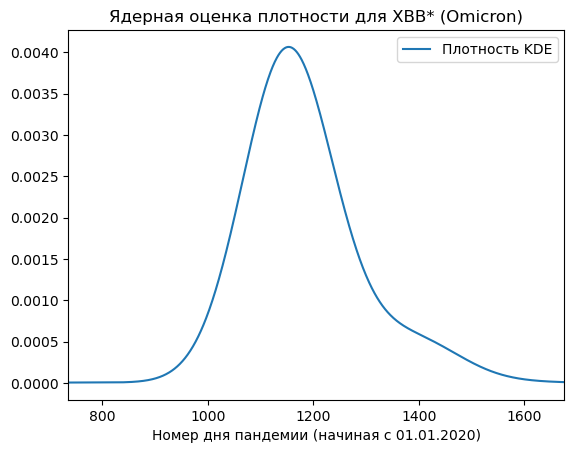

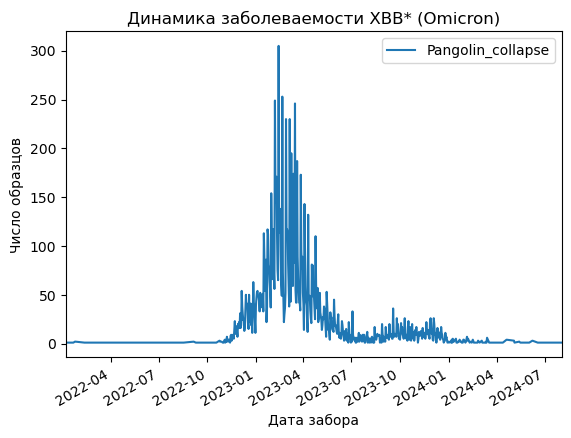

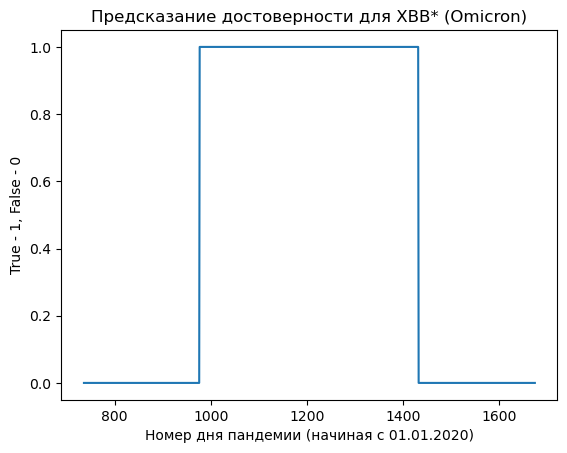

In [249]:
create_statistics(strain="XBB* (Omicron)", date='2024-12-15', start_date=start_date)

Разделим функцию на более простые

In [94]:
def df_preprocessing(df, start_date):
    df = df[df["Дата забора"] > start_date]
    df.dropna(subset=["Pangolin"], inplace=True)
    df["Pangolin_collapse"] = df["Pangolin"].apply(lambda x: m.create_collapsed_strain(x.split(" ")[0]))
    
    start_date = datetime(2020, 1, 1)

    # Преобразование даты в количество дней от 1 января 2020 года
    df['дни_с_2020'] = (df['Дата забора'] - start_date).dt.days
    df.dropna(subset=["дни_с_2020"], inplace=True)
    return df

In [96]:
df_preprocessing(df, datetime(2020, 1, 1))

/tmp/ipykernel_82429/209023222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["Pangolin"], inplace=True)
/tmp/ipykernel_82429/209023222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pangolin_collapse"] = df["Pangolin"].apply(lambda x: m.create_collapsed_strain(x.split(" ")[0]))
/tmp/ipykernel_82429/209023222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,id последовательности,Дата забора,Pangolin,Pangolin_collapse,дни_с_2020
0,crie000002,2020-12-28,B.1.1,B.1.1*,362
1,crie000003,2020-12-28,B.1.1,B.1.1*,362
40,crie000005,2020-03-27,B.1,B.1*,86
41,crie000006,2020-11-06,B.1.1,B.1.1*,310
42,crie000007,2020-11-06,B.1.1.397,B.1.1*,310
...,...,...,...,...,...
332939,petr000819,2024-09-30,KS.1.1 Omicron (BA.2-like),KS.1* (Omicron),1734
332940,petr000820,2024-09-30,LF.1.1 Omicron (BA.2-like),JN.1* (Omicron),1734
332942,petr000822,2024-09-30,KS.1.1 Omicron (BA.2-like),KS.1* (Omicron),1734
332964,petr000844,2024-09-30,KS.1 Omicron (BA.2-like),KS.1* (Omicron),1734


In [60]:
def find_day_number(date, start_date):
    new_date = pd.to_datetime(date)
    day_number = (new_date - start_date).days
    return day_number

In [61]:
date = '2024-12-15'
start_date = datetime(2020, 1, 1)
find_day_number(date=date, start_date=start_date)

1810

In [62]:
strain_df["Дата забора"].max()

Timestamp('2024-09-16 00:00:00')

In [63]:
def create_strain_df(strain, date, df):
    new_date = pd.to_datetime(date)
    strain_df = df[df["Pangolin_collapse"] == strain]
    if new_date > strain_df["Дата забора"].max():
        strain_df = strain_df[(strain_df["Дата забора"] <= (new_date - pd.tseries.offsets.Day()))]# берём без учета дня загрузки текущего сиквенса
    if len(strain_df) <= 1:
        print("Данных для анализа недостаточно")
        return None
    strain_df.sort_values(by="Дата забора", inplace=True)
    return strain_df

In [64]:
strain = "XBB* (Omicron)"
date = '2024-12-15'
strain_df = create_strain_df(strain=strain, date=date, df=subdf)
strain_df

,id последовательности,Дата забора,Pangolin,Pangolin_collapse,дни_с_2020
227929,irkn007730,2022-01-06,XBB.1 Omicron (XBB.1-like),XBB* (Omicron),736
228575,vect008781,2022-01-15,XBB.1 Omicron (XBB-like),XBB* (Omicron),745
228802,obol014170,2022-01-16,XBB.1 Omicron (XBB.1-like),XBB* (Omicron),746
228824,crie046276,2022-01-17,XBB.1.9.3 Omicron (XBB.1-like),XBB* (Omicron),747
254089,infl032397,2022-01-20,XBB.1 Omicron (XBB.1-like),XBB* (Omicron),750
...,...,...,...,...,...
326413,omsk000877,2024-06-25,XBB.1 Probable Omicron (Unassigned),XBB* (Omicron),1637
326215,keme000040,2024-06-29,XBB.1,XBB* (Omicron),1641
327020,perm000955,2024-07-01,FY.5.1.1 Omicron (XBB.1-like),XBB* (Omicron),1643
327383,keme000062,2024-07-13,XBB.1,XBB* (Omicron),1655


In [65]:
def create_kde(strain_df):
    # Получение значений для KDE
    values = strain_df['дни_с_2020'].values

    # Построение KDE
    kde = gaussian_kde(values, bw_method=0.8)
    return kde

In [66]:
date = '2024-12-15'
strain = "XBB* (Omicron)"
strain_df = create_strain_df(strain=strain, date=date, df=subdf)
create_kde(strain_df=strain_df)

In [67]:
def create_threshold(kde, strain_df):
    # Генерация числовых значений для оси X (например, все дни c 2020)
    x = np.arange(start=0, stop=365*5)

    # Оценка плотности для каждого дня в году
    density = kde(x)
    q = lambda df: 75 if len(df) > 250 else 90
    threshold = np.percentile(density, q(strain_df))
    return threshold

In [68]:
strain = "XBB* (Omicron)"
strain_df = create_strain_df(strain=strain, date=date, df=subdf)
kde = create_kde(strain_df=strain_df)
create_threshold(kde=kde, strain_df=strain_df)

0.0004883111153088284

In [69]:
def correct_or_error_collection_date(day_number, threshold, kde):
    probability = kde(day_number)
    return probability > threshold

In [70]:
start_date = datetime(2020, 1, 1)
date = '2022-12-15'
strain = "XBB* (Omicron)"
day_number = find_day_number(start_date=start_date, date=date)
strain_df = create_strain_df(strain=strain, date=date, df=subdf)
kde = create_kde(strain_df=strain_df)
threshold = create_threshold(kde=kde, strain_df=strain_df)
kde = create_kde(strain_df=strain_df)
correct_or_error_collection_date(day_number=day_number, threshold=threshold, kde=kde)

/tmp/ipykernel_82429/420499113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df.sort_values(by="Дата забора", inplace=True)


array([ True])

In [10]:
def draw_kde(kde, strain, day_number, strain_df):
    # Генерация числовых значений для оси X (например, все дни c 2020)
    x = np.arange(start=0, stop=365*5)
    # Оценка плотности для каждого дня в году
    density = kde(x)
    # Визуализация результатов
    xmin, xmax = strain_df["дни_с_2020"].min(), strain_df["дни_с_2020"].max()
    plt.plot(x, density, label='Плотность KDE')
    plt.xlim(xmin, xmax)
    plt.xlabel('Номер дня пандемии (начиная с 01.01.2020)')
    #plt.ylabel('Плотность')
    plt.title(f'Ядерная оценка плотности для {strain}')
    plt.legend()
    plt.axvline(x=day_number, color='r', linestyle='--')
    plt.show()

/tmp/ipykernel_82429/420499113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df.sort_values(by="Дата забора", inplace=True)


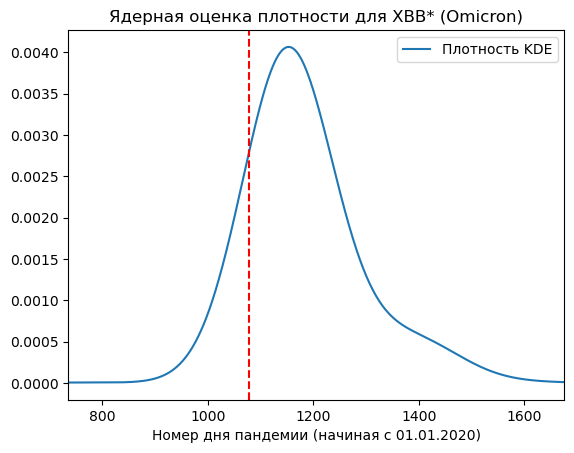

In [79]:
start_date = datetime(2020, 1, 1)
date = '2022-12-15'
strain = "XBB* (Omicron)"
day_number = find_day_number(date=date, start_date=start_date) 
strain_df = create_strain_df(strain=strain, date=date, df=subdf)
kde = create_kde(strain_df=strain_df)
draw_kde(kde=kde, strain=strain, day_number=day_number, strain_df=strain_df)

In [76]:
strain_df.groupby(by="Дата забора").agg({"Pangolin_collapse":"count"}).sort_values(by="Pangolin_collapse", ascending=False)

,Pangolin_collapse
Дата забора,
2023-02-13,305
2023-02-20,253
2023-02-06,249
2023-03-16,246
2023-02-27,230
...,...
2023-08-01,1
2023-07-27,1
2023-07-26,1


In [77]:
def draw_morbidity(strain_df, strain, date):
    # Оценка вероятности для новых событий
    # Определение границ оси X
    xmin_date, xmax_date = strain_df["Дата забора"].min(), strain_df["Дата забора"].max()
    #xmin, xmax = "2023-10-01", "2024-12-01"
    strain_df.groupby(by="Дата забора").agg({"Pangolin_collapse":"count"}).plot(kind="line")
    plt.xlim(xmin_date, xmax_date)
    plt.ylabel('Число образцов')
    plt.title(f'Динамика заболеваемости {strain}')
    plt.legend()
    plt.axvline(x=date, color='r', linestyle='--')
    plt.show()

/tmp/ipykernel_82429/420499113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df.sort_values(by="Дата забора", inplace=True)


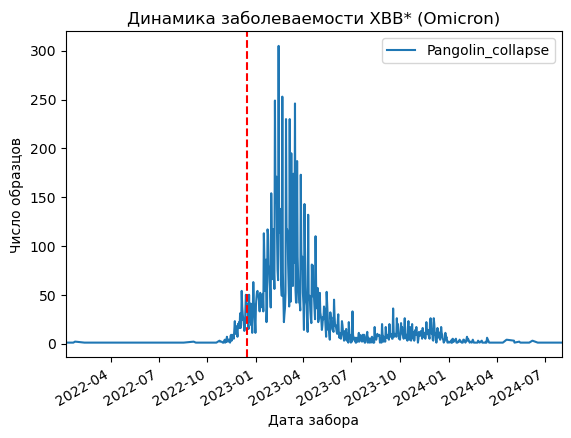

In [78]:
start_date = datetime(2020, 1, 1)
date = '2022-12-15'
strain = "XBB* (Omicron)"
strain_df = create_strain_df(strain=strain, date=date, df=subdf)
draw_morbidity(strain_df=strain_df, strain=strain, date=date)

In [81]:
def draw_predictions(kde, strain, strain_df, threshold, day_number):
    xmin, xmax = strain_df["дни_с_2020"].min(), strain_df["дни_с_2020"].max()
    res = []
    for i in np.arange(xmin, xmax):
        probability = kde(i)
        #print(f'Вероятность события {new_date_day}: {probability[0]}')
        #print((probability > threshold)[0])
        res.append((probability > threshold)[0])
    ax = sns.lineplot(x=[i for i in np.arange(xmin, xmax)], y=res)
    ax.set_title(f'Предсказание достоверности для {strain}')
    ax.set_xlabel('Номер дня пандемии (начиная с 01.01.2020)')
    ax.set_ylabel('True - 1, False - 0')
    #plt.axvline(x=day_number, color='r', linestyle='--')
    plt.show()    

/tmp/ipykernel_82429/420499113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df.sort_values(by="Дата забора", inplace=True)


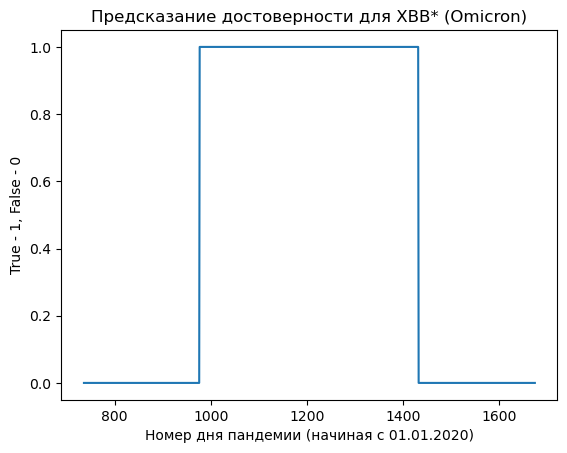

In [82]:
start_date = datetime(2020, 1, 1)
strain = "XBB* (Omicron)"
strain_df = create_strain_df(strain=strain, date=date, df=subdf)
kde = create_kde(strain_df=strain_df)
threshold = create_threshold(kde=kde, strain_df=strain_df)
day_number = find_day_number(date=date, start_date=start_date) 
draw_predictions(kde=kde, strain=strain, strain_df=strain_df, threshold=threshold, day_number=day_number)

In [83]:
strain_df

,id последовательности,Дата забора,Pangolin,Pangolin_collapse,дни_с_2020
227929,irkn007730,2022-01-06,XBB.1 Omicron (XBB.1-like),XBB* (Omicron),736
228575,vect008781,2022-01-15,XBB.1 Omicron (XBB-like),XBB* (Omicron),745
228802,obol014170,2022-01-16,XBB.1 Omicron (XBB.1-like),XBB* (Omicron),746
228824,crie046276,2022-01-17,XBB.1.9.3 Omicron (XBB.1-like),XBB* (Omicron),747
254089,infl032397,2022-01-20,XBB.1 Omicron (XBB.1-like),XBB* (Omicron),750
...,...,...,...,...,...
326413,omsk000877,2024-06-25,XBB.1 Probable Omicron (Unassigned),XBB* (Omicron),1637
326215,keme000040,2024-06-29,XBB.1,XBB* (Omicron),1641
327020,perm000955,2024-07-01,FY.5.1.1 Omicron (XBB.1-like),XBB* (Omicron),1643
327383,keme000062,2024-07-13,XBB.1,XBB* (Omicron),1655


In [9]:
to_save

PosixPath('/export/home/agletdinov/work/git_projects/temporary_qualifier-sars_cov_2/data/ежедневный_расширенный_отчёт_2024-10-05 16-00-01.tsv_filt.tsv.gz')

In [4]:
to_file = DATA / "ежедневный_расширенный_отчёт_2024-10-05 16-00-01.tsv.gz"
to_save = DATA.joinpath(to_file.stem + "_filt.tsv.gz")
if to_save.exists():
    print(f"Skipped")
    df_filt = pd.read_csv(to_save, sep='\t',quoting=3,
                         usecols=["id последовательности", "Дата забора", "Pangolin", "Pangolin_collapse", "дни_с_2020"],
                         dtype={"id последовательности": str,
                                "Pangolin": str,
                                "Pangolin_collapse": str,
                                "дни_с_2020": int},
                         parse_dates=['Дата забора'])
else:
    df = pd.read_csv(to_file, sep='\t',quoting=3,
                     usecols=["id последовательности", "Дата забора", "Pangolin"],
                     dtype={"id последовательности": str,
                            "Pangolin": str},
                     parse_dates=['Дата забора'])
    df_filt = df_preprocessing(df, start_date)
    print(df_filt.shape)
    df_filt.to_csv(to_save,
                   sep="\t",
                   index=False,
                   compression='gzip')

Skipped


In [5]:
def create_statistics_pipe(strain, date, df, start_date):
    strain_df = create_strain_df(strain=strain, date=date, df=df)
    kde = create_kde(strain_df=strain_df)
    threshold = create_threshold(kde=kde, strain_df=strain_df)
    day_number = find_day_number(date=date, start_date=start_date)
    
    draw_kde(kde=kde, strain=strain, day_number=day_number, strain_df=strain_df)
    draw_morbidity(strain_df=strain_df, strain=strain, date=date)
    draw_predictions(kde=kde, strain=strain, strain_df=strain_df, threshold=threshold, day_number=day_number)
    
    print(correct_or_error_collection_date(day_number=day_number, threshold=threshold, kde=kde))

/export/home/agletdinov/work/git_projects/temporary_qualifier-sars_cov_2/scripts/modules.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df.sort_values(by="Дата забора", inplace=True)


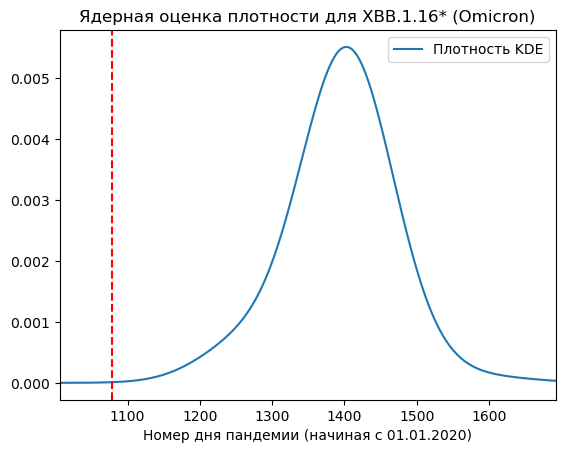

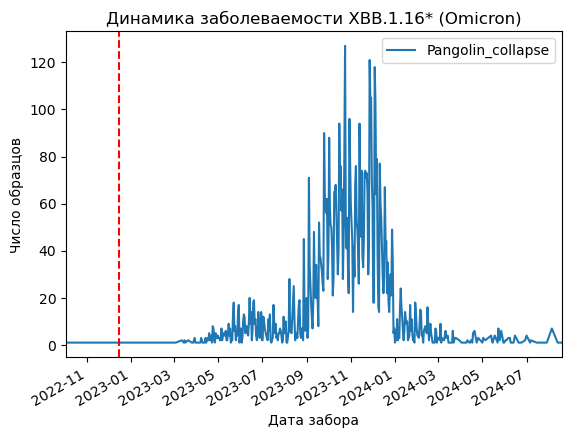

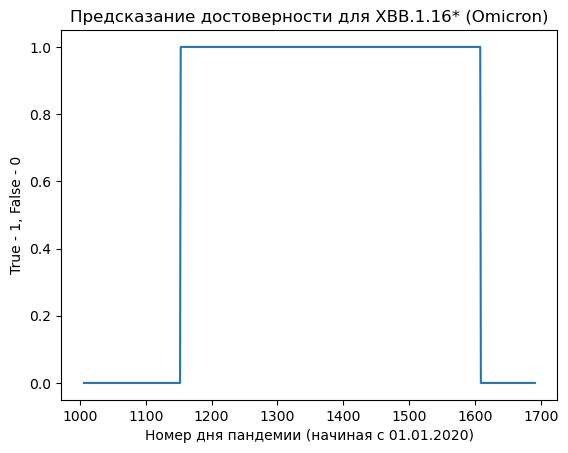

[False]


In [7]:
strain = m.create_collapsed_strain("XBB.1.16")#"BA.2* (Omicron)"
date = '2022-12-15'
start_date = datetime(2020, 1, 1)

create_statistics_pipe(strain=strain, date=date, df=df_filt, start_date=start_date)

In [309]:
new_date = '03.02.20'
new_date_day = (pd.to_datetime(new_date) - start_date).days
new_date_day

61

In [306]:
new_date = '2020-02-03'
new_date_day = (pd.to_datetime(new_date) - start_date).days
new_date_day

33

In [310]:
pd.to_datetime('03.02.20')

Timestamp('2020-03-02 00:00:00')

In [311]:
pd.to_datetime('2020-02-03')

Timestamp('2020-02-03 00:00:00')